# EDA zbioru danych Irysy

In [7]:
import pandas as pd
from IPython.display import HTML

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('iris_dataset.csv', sep = ',')

## Wiedza domenowa

Przedmiotem EDA będzie zbiór danych związany z kwiatami irysy. Irysy to piękne, wieloletnie rośliny ozdobne należące do rodziny kosaćcowatych (Iridaceae). Znane są ze swoich charakterystycznych, eleganckich kwiatów, które występują w szerokiej gamie kolorów, od bieli i żółci po fiolet i niebieski. Każdy kwiat irysa składa się z trzech wzniesionych płatków wewnętrznych oraz trzech skierowanych w dół działek kielicha, które często przyjmują formę "brody" na środku.

Irysy są popularne w ogrodach na całym świecie ze względu na swoją urodę, a także różnorodność form i kolorów. Szczególnie cenionymi gatunkami są Iris setosa, Iris versicolor i Iris virginica, które są również częścią klasycznego zbioru danych używanego w analizie statystycznej i uczeniu maszynowym. Te kwiaty nie tylko dodają estetyki do krajobrazów, ale także stanowią doskonały temat badań ze względu na wyraźne różnice między gatunkami, co czyni je idealnym modelem do nauki o klasyfikacji danych.

## Rodzaje Irysów

![info_irys](https://miro.medium.com/v2/resize:fit:720/1*YYiQed4kj_EZ2qfg_imDWA.png)

## Podstawowe wymiary

![wymiary_irys](https://www.integratedots.com/wp-content/uploads/2019/06/iris_petal-sepal-e1560211020463.png)

## Wstępna analiza danych

Na samym początku zostanie przeprowadzona krótka analiza ogólnego zarysu zbioru danych, m.in. sprawdzając losowe rekordy lub wartości unikatowe.

### Losowe 5 rzędów

* istnieją cztery główne wymiary (dł. i szer. kielicha oraz dł. i szer. płatka),
* wyróżniamy trzy rodzaje irysów,
* każdy irys ma odmienne wymiary (zależnie od rodzaju).

In [11]:
sample_df = df.sample(n=5, random_state=123)
html = sample_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
6.3,2.5,4.9,1.5,Iris-versicolor
6.8,3.0,5.5,2.1,Iris-virginica
6.4,2.8,5.6,2.2,Iris-virginica
5.6,3.0,4.1,1.3,Iris-versicolor
4.9,3.1,1.5,0.1,Iris-setosa


### Wartości unikatowe

In [14]:
unique_values_df = df.nunique().reset_index()
unique_values_df.columns = ['Kolumna', 'Liczba unikatowych wartości']
unique_values_df
html = unique_values_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

Kolumna,Liczba unikatowych wartości
długość kielicha (sepal length),35
szerokość kielicha (sepal width),23
długość płatka (petal length),43
szerokość płatka (petal width),22
klasa (class),3


### Statystyki opisowe

In [14]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
długość kielicha (sepal length),150.0,5.84,0.83,4.3,5.1,5.80,6.4,7.9
szerokość kielicha (sepal width),150.0,3.05,0.43,2.0,2.8,3.00,3.3,4.4
długość płatka (petal length),150.0,3.76,1.76,1.0,1.6,4.35,5.1,6.9
szerokość płatka (petal width),150.0,1.20,0.76,0.1,0.3,1.30,1.8,2.5


### Podsumowanie wstępnej analizy:
* zbiór danych zawiera 150 pomiarów irysów dla trzech rodzajów,
* najmniejszy rozrzut od średniej występuje dla szerokości kielicha, gdzie średnia ~ mediana,
* największy rozrzut pomiarów wystąpił dla długości płatka,
* minimalny pomiar wyniósł 0.1 cm dla szerokości płatka - warto by było ustalić jakie narzędzie pomiarowe zostało zastosowane do tak małej wartości pomiaru,
* z wartości unikatowych wynika, że największa powtarzalność jest przy długości płatka (ok. 29%), natomiast najmniejsza przy szerokości płatka i szerokości kielicha (ok. 15%),
* wszystkie różnice w pomiarach mogą wynikać z błędu pomiarowego.

## Analiza wartości brakujących

Sprawdzenie czy w danym zbiorze danych znajdują się wartości brakujące, które mogłyby zaburzyć końcowe wyniki.

### Ilościowe zestawienie brakujących wartości w analizowanym zbiorze danych:

In [15]:
missing_values_df = df.isnull().sum().reset_index()
missing_values_df.columns = ['Kolumna', 'Liczba brakujących wartości']
missing_values_df
html = missing_values_df.to_html(index=False)

# Wyświetl HTML
HTML(html)

Kolumna,Liczba brakujących wartości
długość kielicha (sepal length),0
szerokość kielicha (sepal width),0
długość płatka (petal length),0
szerokość płatka (petal width),0
klasa (class),0


### Podsumowanie analizy wartości brakujących:
* nie ma żadnych brakujących wartości,
* dane są precyzyjne i nie trzeba ich modyfikować.

## Analiza pojedynczych wartości

Żeby jak najlepiej zrozumieć wszelkie korelacje pomiędzy danymi oraz ich istotność - należy najpierw zgłębić wiedzę dotyczącą pojedynczych rekordów.

### Histogramy 

In [16]:
#tworzę trzy DF dla każdego rodzaju Irysa
setosa_df = df[df['klasa (class)'].isin(['Iris-setosa'])]
virginica_df = df[df['klasa (class)'].isin(['Iris-virginica'])]
versicolor_df = df[df['klasa (class)'].isin(['Iris-versicolor'])]

#### Histogram irys-setosa:

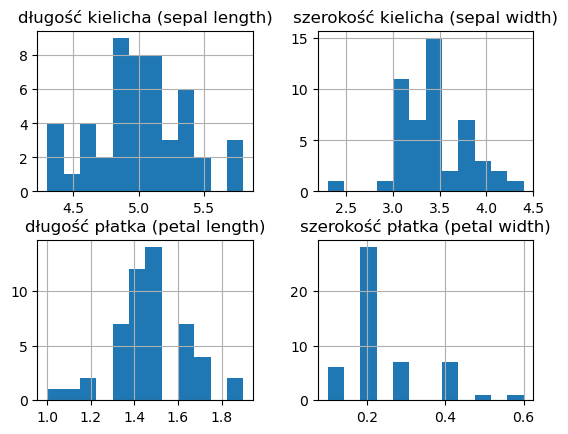

In [18]:
setosa_df.hist(bins=12);

#### Histogram wymiarów Irys-virginica:

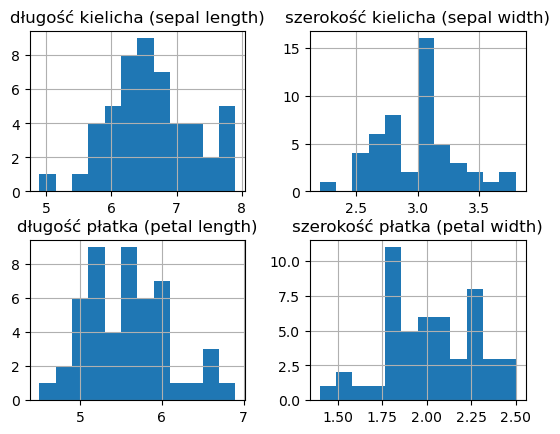

In [19]:
virginica_df.hist(bins=12);

#### Histogram dla irys-versicolor:

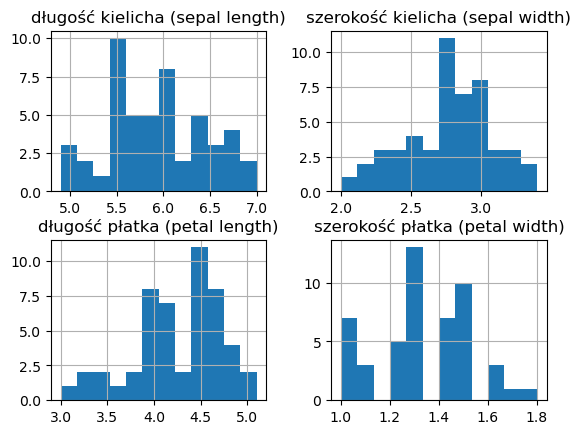

In [20]:
versicolor_df.hist(bins=12);

**Wnioski płynące z histogramów:**
* irys-setos mają najczęstsze szer. płatka ~0.2 cm (prawie 30 pomiarów w tym zakresie),
* dla trzech rodzajów irysa: szer. kielicha najczęściej mieści się od 2.75 do 3.5 cm,
* pod względem wielkości tak prezentują się rodzaje irysów w kolejności rosnącej: irys-setosa -> irys-versicolor -> irys-virginica.

### Wykres liniowy przedstawiający zakres pomiarów:

In [23]:
import matplotlib.pyplot as plt

* można zauważyć, że dł. płatka ma największe rozrzuty pomiędzy rodzajami irysa (najmniejsze wartości dla irys-setos),
* szer. kielicha to wymiar, który ma najbardziej zbliżone wartości dla wszystkich rodzajów irysa.

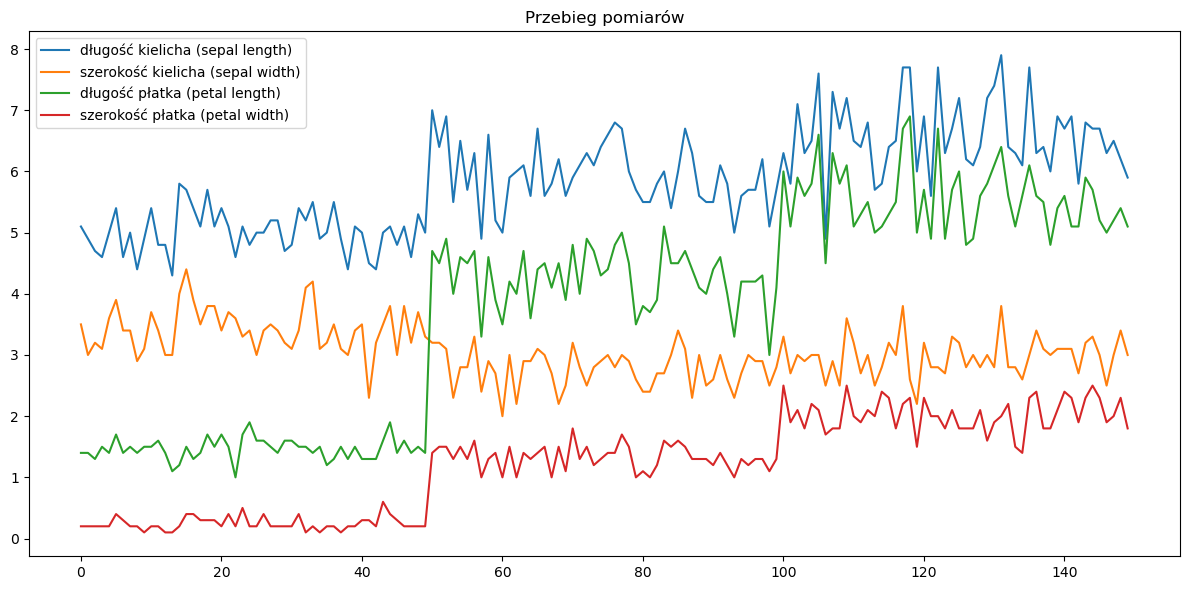

In [27]:
ax = df.plot(title = 'Przebieg pomiarów', figsize=(12,6))
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### Wykresy słupkowe

#### Barplot dla szerokości płatka:
* najczęstszym pomiarem był pomiar szer. płatka dla irysa-setosa (pomiar ~0.2 cm stanowił ~19% wszystkich pomiarów),
* zachowana jest zależność, że szer. płatka wzrasta ze zmianą rodzaju irysa.

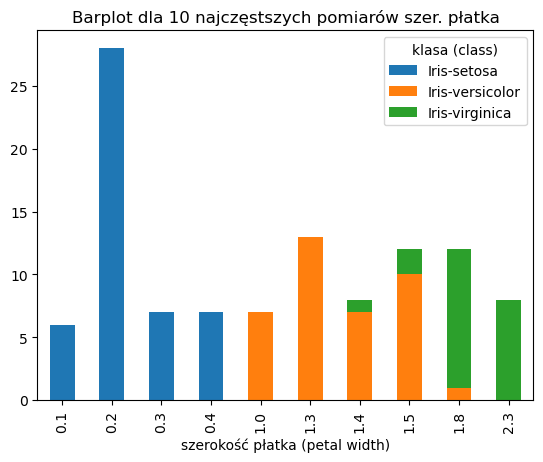

In [29]:
#tworzę zmienną zawiejącą 10 najczęstszych pomiarów szer. płatka w formie indeksów
top_10_petal_width = df['szerokość płatka (petal width)'].value_counts().nlargest(10).index
#tworzę DF, który sprawdza czy 10 najczęstszych pomiarów szer. płatka zawiera się w odpowiedniej kolumnie
top_10_petal_width_df = df[df['szerokość płatka (petal width)'].isin(top_10_petal_width)]
#tworzę DF, który zawiera podział pomiarów szer. płatka w zależności od rodzaju irysa
petal_width_df = top_10_petal_width_df.groupby(['szerokość płatka (petal width)', 'klasa (class)']).size().unstack()
#tworzę barplot
petal_width_df.plot(kind = 'bar', stacked = True, title = 'Barplot dla 10 najczęstszych pomiarów szer. płatka');

#### Barplot dla długości płatka:

* zachowana jest zależność, że szer. płatka wzrasta ze zmianą rodzaju irysa.

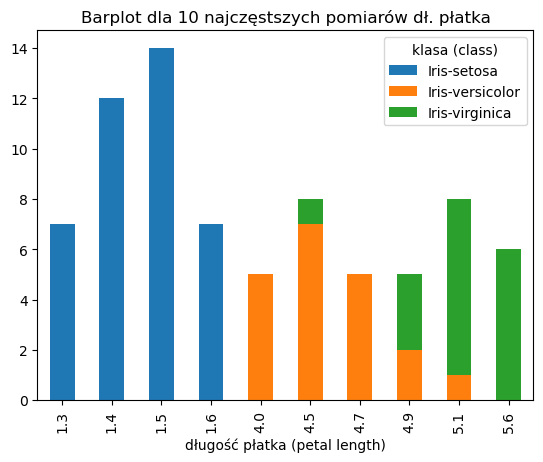

In [31]:
#tworzę zmienną zawiejącą 10 najczęstszych pomiarów dł. płatka w formie indeksów
top_10_petal_length = df['długość płatka (petal length)'].value_counts().nlargest(10).index
#tworzę DF, który sprawdza czy 10 najczęstszych pomiarów dł. płatka zawiera się w odpowiedniej kolumnie
top_10_petal_length_df = df[df['długość płatka (petal length)'].isin(top_10_petal_length)]
#tworzę DF, który zawiera podział pomiarów dł. płatka w zależności od rodzaju irysa
petal_length_df = top_10_petal_length_df.groupby(['długość płatka (petal length)', 'klasa (class)']).size().unstack()
#tworzę barplot
petal_length_df.plot(kind = 'bar', stacked = True, title = 'Barplot dla 10 najczęstszych pomiarów dł. płatka');

#### Barplot dla szerokości kielicha:

* w odróżnieniu do wymiarów płatka -> irys-setos posiada najszerszy kielich,
* najbardziej rozrzucone pomiary są dla iris-versicolor (od 2.5 aż do 3.4 cm),
* najczęściej występuje szerokość kielicha ~3cm (szczególnie w przypadku irysa-virginica).

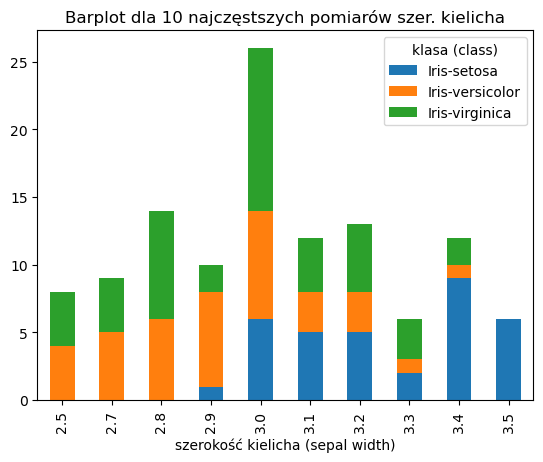

In [32]:
#tworzę zmienną zawiejącą 10 najczęstszych pomiarów szer. kielicha w formie indeksów
top_10_sepal_width = df['szerokość kielicha (sepal width)'].value_counts().nlargest(10).index
#tworzę DF, który sprawdza czy 10 najczęstszych pomiarów szer. kielicha zawiera się w odpowiedniej kolumnie
top_10_sepal_width_df = df[df['szerokość kielicha (sepal width)'].isin(top_10_sepal_width)]
#tworzę DF, który zawiera podział pomiarów szer. kielicha w zależności od rodzaju irysa
sepal_width_df = top_10_sepal_width_df.groupby(['szerokość kielicha (sepal width)', 'klasa (class)']).size().unstack()
#tworzę barplot
sepal_width_df.plot(kind = 'bar', stacked = True, title = 'Barplot dla 10 najczęstszych pomiarów szer. kielicha');

#### Barplot dla długości kielicha:

* najbardziej rozrzucone pomiary są dla iris-versicolor (od 4.9 aż do 6.7 cm),
* najmniejszą dł. kielicha ma iris-setosa a największą iris-virginica,
* dla irysa-virginica kilka pomiarów było zauważalnie mniejszych od pozostałych.

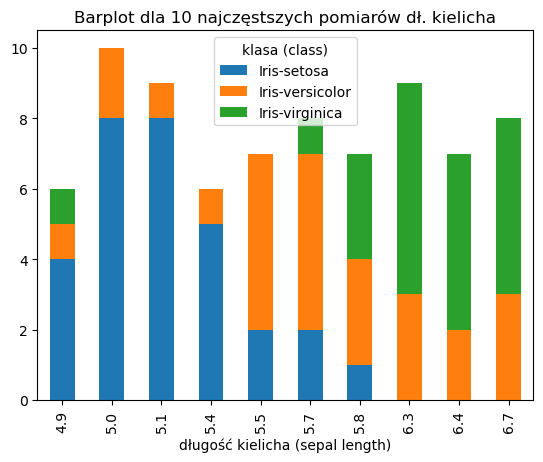

In [33]:
#tworzę zmienną zawiejącą 10 najczęstszych pomiarów dł. kielicha w formie indeksów
top_10_sepal_length = df['długość kielicha (sepal length)'].value_counts().nlargest(10).index
#tworzę DF, który sprawdza czy 10 najczęstszych pomiarów dł. kielicha zawiera się w odpowiedniej kolumnie
top_10_sepal_length_df = df[df['długość kielicha (sepal length)'].isin(top_10_sepal_length)]
#tworzę DF, który zawiera podział pomiarów dł. kielicha w zależności od rodzaju irysa
sepal_length_df = top_10_sepal_length_df.groupby(['długość kielicha (sepal length)', 'klasa (class)']).size().unstack()
#tworzę barplot
sepal_length_df.plot(kind = 'bar', stacked = True, title = 'Barplot dla 10 najczęstszych pomiarów dł. kielicha');

### Podsumowanie analizy pojedynczych wartości:
* najczęstszy pomiar szerokości płatka występuje dla irysa-setosa i wynosi ~0.2 cm (co stanowi niemal 20% pomiarów),
* wymiary płatka (szer. oraz dł.) rosną wraz ze zmianą rodzaju irysa: setosa->versicolor->virginica,
* najmniejsze płatki mają irysy-setosa,
* dla trzech rodzajów irysa: szer. kielicha najczęściej mieści się od 2.5 do 3.5 cm, co pokazuje, że na ten wymiar ma najmniejszy wpływ rodzaj irysa,
* w odróżnieniu do wymiarów płatka -> irys-setos ma najszerszy kielich ze wszystkich irysów,
* najwiekszy rozrzut w pomiarach wymiarów kielicha występuje dla irysa-versicolor,
* najczęściej występuje szer. kielicha ~3 cm (co stanowi 18% wszystkich pomiarów),
* dł. kielicha jest najmniejsza dla irysa-setosa a największa dla irysa-virginica.


## Analiza korelacji

Po wstępnym oszacowaniu zarysu danych, zgłębieniu pojedynczych rekordów oraz zweryfikowaniu wartości brakujących - istnieje możliwość zrozumieć korelacyjność danych.

### Macierz korelacji dla wymiarów irysa:

* wymiary płatka (szer. i dł.) zależą wzajemnie od siebie,
* na wymiary płatka (szer. i dł.) ma bardzo duży wpływ długość kielicha,
* wymiary kielicha (szer. i dł.) są od siebie niemalże niezależne,
* połowiczna odwrotna korelacja występuje pomiędzy szerokością kielicha a wymiarami płatka.

In [34]:
df[['szerokość płatka (petal width)', 'długość płatka (petal length)', 
    'szerokość kielicha (sepal width)', 'długość kielicha (sepal length)']].corr()

,szerokość płatka (petal width),długość płatka (petal length),szerokość kielicha (sepal width),długość kielicha (sepal length)
szerokość płatka (petal width),1.000000,0.962757,-0.356544,0.817954
długość płatka (petal length),0.962757,1.000000,-0.420516,0.871754
szerokość kielicha (sepal width),-0.356544,-0.420516,1.000000,-0.109369
długość kielicha (sepal length),0.817954,0.871754,-0.109369,1.000000


### Wykresy punktowe dla rodzajów irysa oraz wymiarów irysa:

* każdy rodzaj irysa ma inne wymiary płatków oraz kielichów.

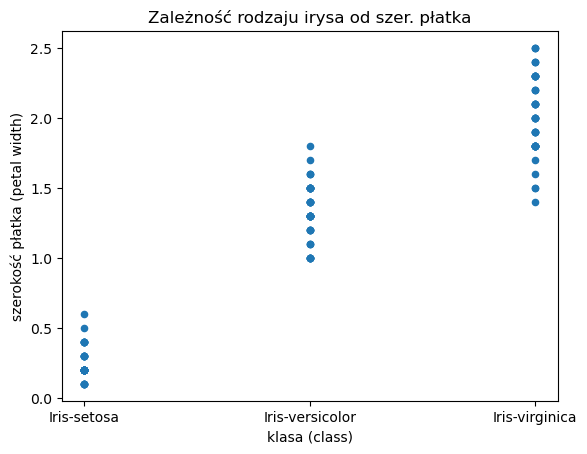

In [36]:
df.plot(kind = 'scatter', x = 'klasa (class)', y = 'szerokość płatka (petal width)', 
        title = 'Zależność rodzaju irysa od szer. płatka');

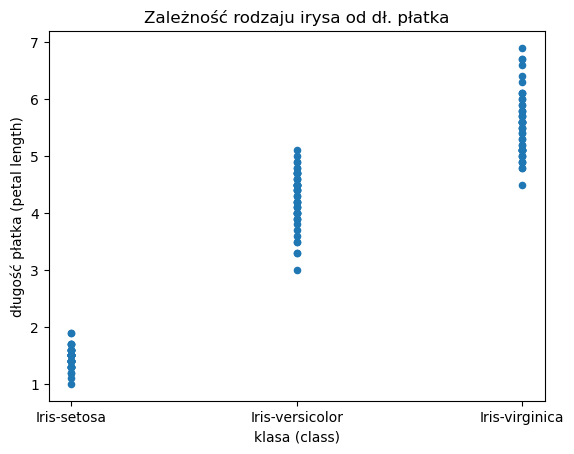

In [37]:
df.plot(kind = 'scatter', x = 'klasa (class)', y = 'długość płatka (petal length)',
       title = 'Zależność rodzaju irysa od dł. płatka');

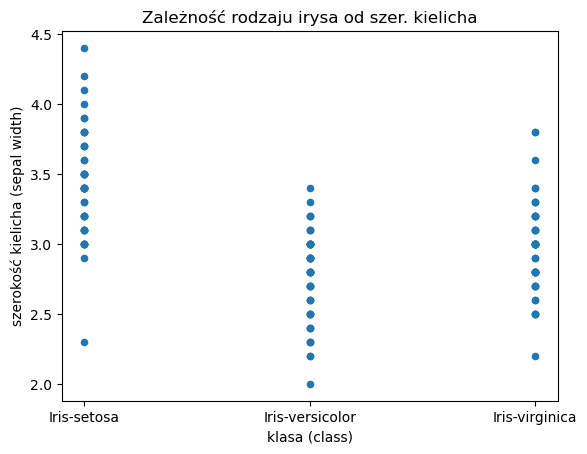

In [38]:
df.plot(kind = 'scatter', x = 'klasa (class)', y = 'szerokość kielicha (sepal width)',
       title = 'Zależność rodzaju irysa od szer. kielicha');

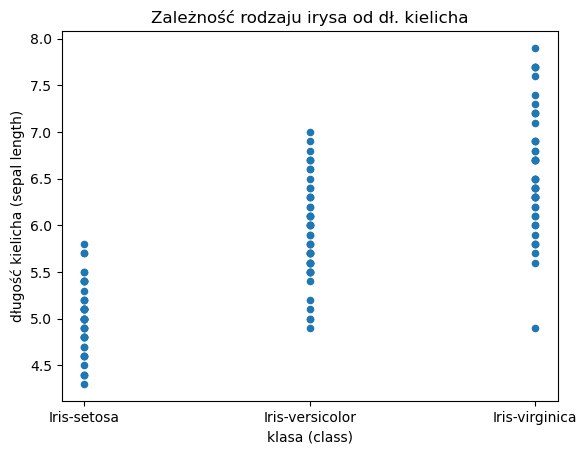

In [39]:
df.plot(kind = 'scatter', x = 'klasa (class)', y = 'długość kielicha (sepal length)',
       title = 'Zależność rodzaju irysa od dł. kielicha');

### Wykresy punktowe dla największych korelacji pomiędzy wymiarami irysa:

* Można zaobserwować korelacje dodatnią -> im większa szer. płatka tym większa dł. płatka.

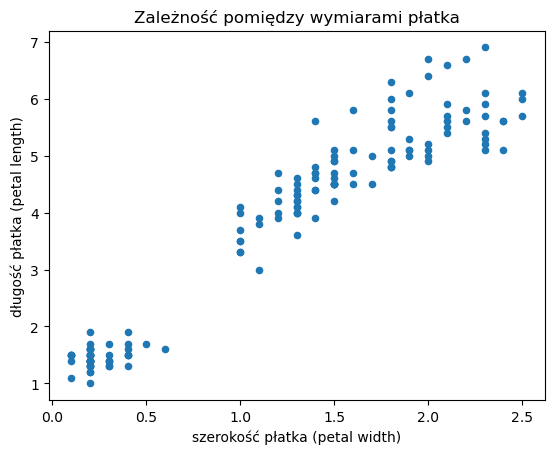

In [40]:
df.plot(kind = 'scatter', x = 'szerokość płatka (petal width)', y = 'długość płatka (petal length)',
       title = 'Zależność pomiędzy wymiarami płatka');

* Można zaobserwować korelacje dodatnią pomiędzy wymiarami płatka a długością kielicha -> im większa dł. kielicha tym większe będą szer. i dł. płatka.

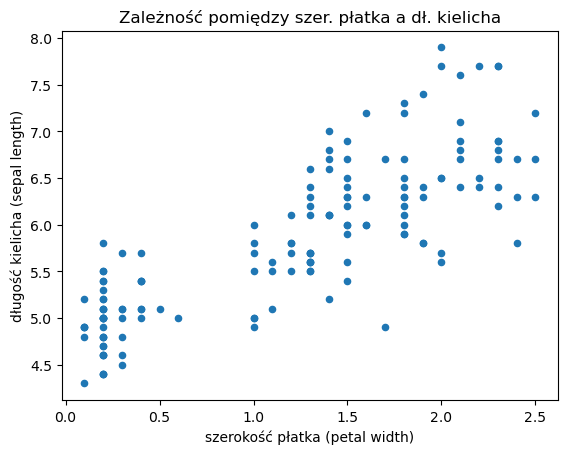

In [41]:
df.plot(kind = 'scatter', x = 'szerokość płatka (petal width)', y = 'długość kielicha (sepal length)',
       title = 'Zależność pomiędzy szer. płatka a dł. kielicha');

* Większa zależność występuje dla wymiarów: dł. płatka oraz dł. kielicha.

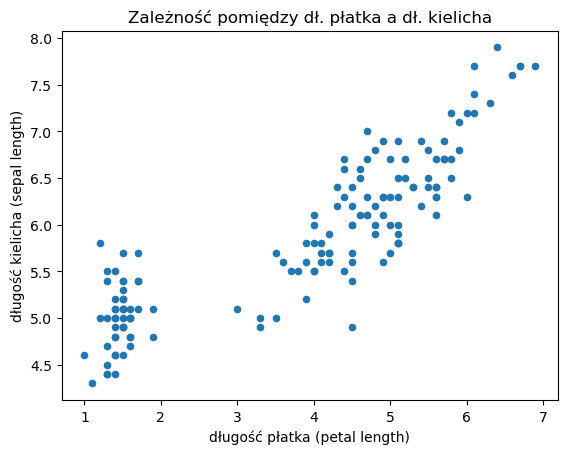

In [42]:
df.plot(kind = 'scatter', x = 'długość płatka (petal length)', y = 'długość kielicha (sepal length)',
       title = 'Zależność pomiędzy dł. płatka a dł. kielicha');

* Pomiędzy dł. a szer. kielicha występuje korelacja zerowa -> te wymiary nie mają na siebie wpływu.

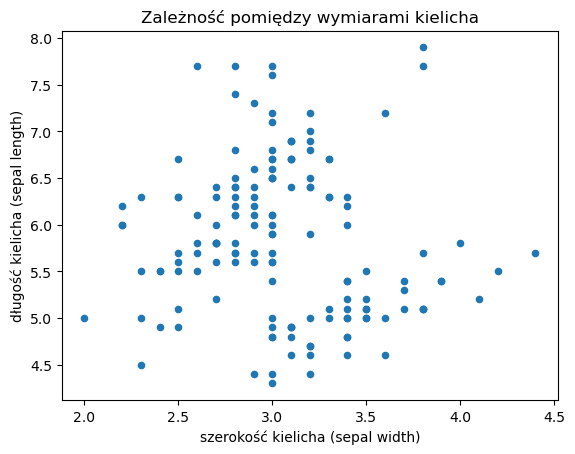

In [43]:
df.plot(kind = 'scatter', x = 'szerokość kielicha (sepal width)', y = 'długość kielicha (sepal length)',
        title = 'Zależność pomiędzy wymiarami kielicha');

### Podsumowanie analizy korelacji:
* wymiary płatka (długość i szerokość) są w korelacji dodatniej,
* wymiary kielicha nie zależą od siebie (korelacja zerowa),
* im większa długość kielicha tym większe wymiary płatka (szer. i dł.),
* rodzaj irysa wpływa ma wymiary kielicha oraz płatka.

## Analiza wartości odstających

Aby wysnuć ostateczne wnioski - warto zweryfikować również czy w analizowanym zbiorze danych występują jakieś wartości odstające, które mogłyby wprowadzić niepotrzebny szum do analizy.

### Boxplots dla wymiarów irysa w zależności od jego rodzaju

#### Boxplot dla szerokości płatka:

* wartości odstające wystąpiły tylko dla rodzaju: iris-setosa (2 outliers),
* w przypadku iris-setosa: mediana wyniosła ~0,2 cm (czyli najczęściej występujący pomiar) i była na równi z kwartylem 1 -> co oznacza, że 75% pomiarów było powyżej mediany,
* największy rozrzut w pomiarach widać dla rodzaju: iris-virginica.

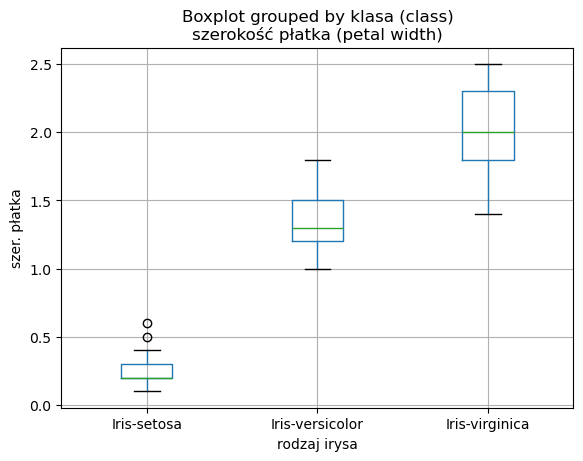

In [44]:
df.boxplot(column='szerokość płatka (petal width)', by= 'klasa (class)', xlabel ='rodzaj irysa', 
          ylabel = 'szer. płatka');

#### Boxplot dla długości płatka:

* wartości odstające wystąpiły dla rodzajów: iris-setosa (3 outliers) oraz iris-versicolor (1 outlier),
* największy rozrzut w pomiarach widać dla rodzaju: iris-virginica.

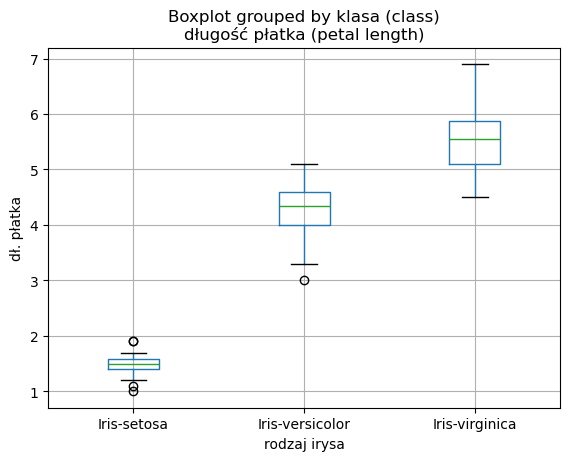

In [45]:
df.boxplot(column='długość płatka (petal length)', by= 'klasa (class)', xlabel ='rodzaj irysa', 
          ylabel = 'dł. płatka');

#### Boxplot dla szerokości kielicha:

* wartości odstające wystąpiły tylko dla rodzaju: iris-virginica (2 outliers),
* największy rozrzut w pomiarach widać dla rodzaju: iris-setosa.

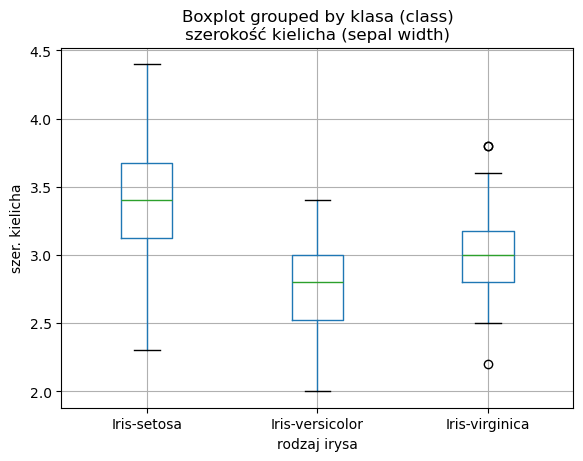

In [46]:
df.boxplot(column='szerokość kielicha (sepal width)', by= 'klasa (class)', xlabel ='rodzaj irysa', 
          ylabel = 'szer. kielicha');

#### Boxplot dla długości kielicha:

* wartości odstające wystąpiły tylko dla rodzaju: iris-virginica (1 outlier),
* największy rozrzut w pomiarach widać dla rodzaju: iris-virginica.

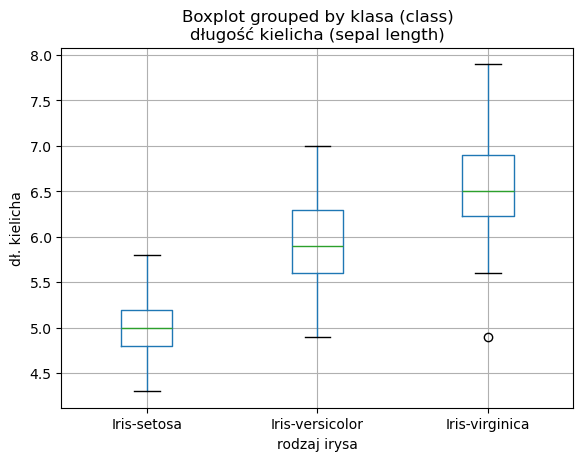

In [47]:
df.boxplot(column='długość kielicha (sepal length)', by= 'klasa (class)', xlabel ='rodzaj irysa', 
          ylabel = 'dł. kielicha');

### Podsumowanie analizy outliers:
* dla wymiarów płatków (szer. i dł.) wartości odstające wystąpiły głównie dla rodzaju: iris-setosa (5) oraz jeden outlier dla iris-versicolor,
* dla wymiarów płatków (szer. i dł.) największy rozrzut w pomiarach wystąpił dla rodzaju: iris-virginica,
* dla wymiarów kielicha (szer. i dł.) wartości odstające wystąpiły jedynie dla rodzaju: iris-virginica (3),
* dla dł. kielicha największy rozrzut w pomiarach wystąpił dla rodzaju: iris-virginica,
* dla szer. kielicha największy rozrzut w pomiarach wystąpił dla rodzaju: iris-setosa,
* w przypadku iris-setosa: mediana była na równi z kwartylem 1 -> co oznacza, że 75% pomiarów było powyżej mediany,
* najmniejszy wpływ rodzaju irysa na wymiary można zauważyć przy szerokości kielicha.

## Wnioski końcowe:
**Przeanalizowano dane dotyczące irysów, w których znajdowały się trzy rodzaje kwiatów: irys-setosa, irys-versicolor oraz irys-virginica, jak również pomiary związane z kielichem (długość i szerokość) oraz płatkiem (długość i szerokość) poszczególnego irysa.
Na podstawie danych - dokonano analizy EDA i wysnuto następujące wnioski:**
* rodzaj irysa wpływa na jego wymiary,
* według danych występuje następująca kolejność rosnąca pod względem wielkości kwiatów: iris-setosa -> iris-versicolor -> iris-virginica (z wyłączeniem szer. kielicha - iris-setos cechuje się najszerszym kielichem),
* najczętszym pomiarem był pomiar szerokości płatka dla rodzaju: iris-setosa i wyniósł ~0,2 cm (co stanowiło niemal 20% wszystkich pomiarów).
* szerokość kielicha to wymiar, który ma najbardziej zbliżone wartości dla wszystkich rodzajów irysa,
* długość płatka ma największy rozrzut w pomiarach pomiędzy rodzajami irysa,
* najczęściej spotykana szerokość kielicha wynosi ok. 3 cm.
* wymiary płatka zależą wzajemnie od siebie,
* wymiary kielicha nie zależą od siebie,
* im większa długość kielicha - tym większe wymiary płatka,
* dla wymiarów płatków wystąpiło 5 wartości odstających dla rodzaju: irys-setosa -> może to być spowodowane jego najmniejszymi gabarytami i problematyką samego pomiaru,
* kwiat irys-virginica miał największy rozrzut w pomiarach.